In [215]:
import numpy as np
import math 
from matplotlib import pyplot as plt


In [216]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

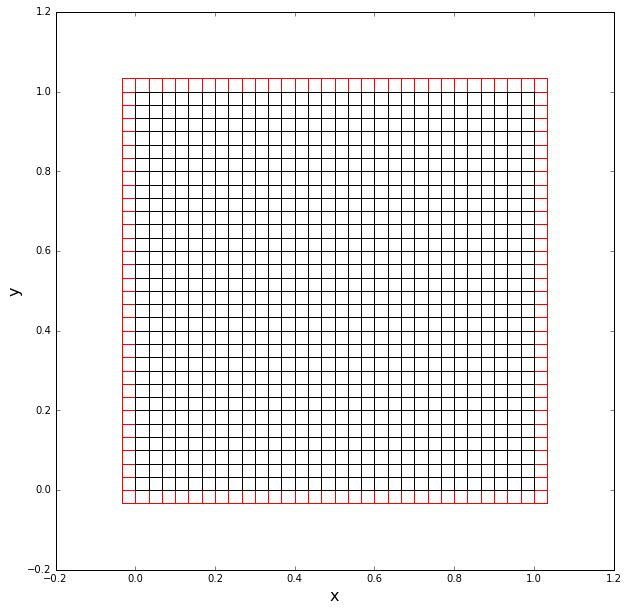

In [217]:
Nx = 30
Ny = 30

Lx = 1.0
Ly = 1.0

dx = Lx/(Nx)
dy = Ly/(Ny)

x_start,x_end = 0.0-dx,Lx+dx
y_start,y_end = 0.0-dy,Ly+dy

y = np.linspace(y_start,y_end,Ny+3)
x = np.linspace(x_start,x_end,Nx+3)
X,Y= np.meshgrid(x,y)

%matplotlib inline
size = 10
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*10))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
#plt.xlim(x_start-dx, x_end+dy)
#plt.ylim(y_start-dy, y_end+dy)
plt.plot(X,Y,color='red')
plt.plot(X.T,Y.T,color='red')
plt.plot(X[1:-1,1:-1], Y[1:-1,1:-1],color='black')
plt.plot(X[1:-1,1:-1].T, Y[1:-1,1:-1].T,color='black')
plt.plot(X[0,:], Y[0,:],color='red')
plt.plot(X[-1,:], Y[-1,:],color='red')
plt.plot(X[:,0], Y[:,0], color='red')
plt.plot(X[:,-1], Y[:,-1],color='red')



[-0.01666667  0.01666667  0.05        0.08333333  0.11666667  0.15
  0.18333333  0.21666667  0.25        0.28333333  0.31666667  0.35
  0.38333333  0.41666667  0.45        0.48333333  0.51666667  0.55
  0.58333333  0.61666667  0.65        0.68333333  0.71666667  0.75
  0.78333333  0.81666667  0.85        0.88333333  0.91666667  0.95
  0.98333333  1.01666667]
[-0.01666667  0.01666667  0.05        0.08333333  0.11666667  0.15
  0.18333333  0.21666667  0.25        0.28333333  0.31666667  0.35
  0.38333333  0.41666667  0.45        0.48333333  0.51666667  0.55
  0.58333333  0.61666667  0.65        0.68333333  0.71666667  0.75
  0.78333333  0.81666667  0.85        0.88333333  0.91666667  0.95
  0.98333333  1.01666667]


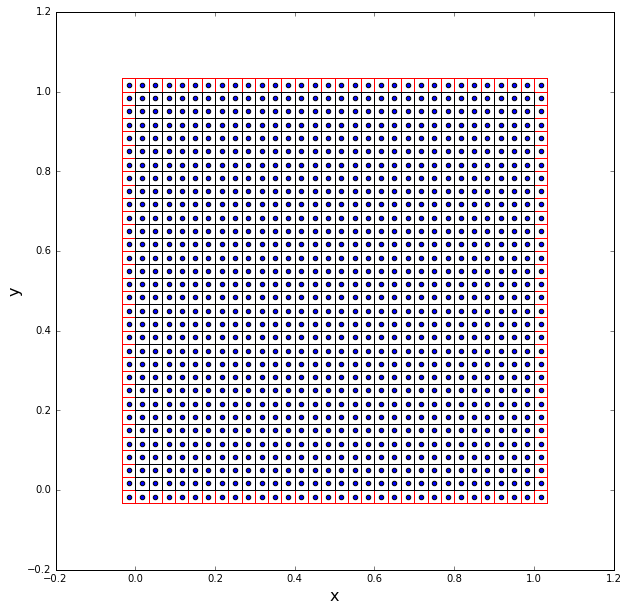

In [218]:
xc = np.linspace(0.,0.,Nx+2) 

for i in range (Nx+2):
    xc[i] = (x[i]+x[i+1])/2

yc = np.linspace(0.,0.,Ny+2)
    
for j in range (Ny+2):
    yc[j] = (y[j]+y[j+1])/2

print (xc)
print (yc)


Xc,Yc= np.meshgrid(xc,yc)


plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*10))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.scatter(Xc,Yc)


#plt.xlim(x_start-dx, x_end+dy)
#plt.ylim(y_start-dy, y_end+dy)
plt.plot(X,Y,color='red')
plt.plot(X.T,Y.T,color='red')
plt.plot(X[1:-1,1:-1], Y[1:-1,1:-1],color='black')
plt.plot(X[1:-1,1:-1].T, Y[1:-1,1:-1].T,color='black')
plt.plot(X[0,:], Y[0,:],color='red')
plt.plot(X[-1,:], Y[-1,:],color='red')
plt.plot(X[:,0], Y[:,0], color='red')
plt.plot(X[:,-1], Y[:,-1],color='red')

# Jacobi Method

In [219]:
counter = 0
n=2.5
u=np.zeros((Nx+2,Ny+2),dtype=float)


while (counter<5000):

    uold = u.copy()
    
    for i in range(1,Nx+1):
        for j in range (1,Ny+1):
            u[i,j]= (8*(math.pi*math.pi)*(n**2)*(math.sin(2*math.pi*n*xc[i]))*(math.sin(2*math.pi*n*yc[j]))*(dy**2)*(dx**2)+uold[i+1,j]*(dy**2)
                    +uold[i-1,j]*(dy**2)+uold[i,j+1]*(dx**2)+uold[i,j-1]*(dx**2))/(2*(dx**2+dy**2))
    for j in range(Ny+2):
         u[0,j]= 2*(math.sin(2*math.pi*n*x[1])*(math.sin(2*math.pi*n*yc[j])))-uold[1,j]
    
    for i in range(Nx+2):
        u[i,0]= 2*(math.sin(2*math.pi*n*xc[i])*(math.sin(2*math.pi*n*y[1])))-uold[i,1]

    for j in range(Ny+2):
        u[Nx+1,j]= 2*(math.sin(2*math.pi*n*x[Nx+1])*(math.sin(2*math.pi*n*yc[j])))-uold[Nx,j]
    
    for i in range(Nx+2):
        u[i,Ny+1]= 2*(math.sin(2*math.pi*n*xc[i])*(math.sin(2*math.pi*n*y[Ny+1])))-uold[i,Ny]
    
    if np.linalg.norm(uold-u)<10**-6:
        break
    

    counter = counter + 1
    
print (counter)

109


In [220]:
u_an=np.zeros((Nx+2,Ny+2),dtype=float)

for i in range(0,Nx+2):
    for j in range (0,Ny+2):
        u_an[i,j] = math.sin(2*math.pi*n*xc[i])*(math.sin(2*math.pi*n*yc[j]))
print (u_an)

[[ 0.0669873 -0.0669873 -0.1830127 ..., -0.1830127 -0.0669873  0.0669873]
 [-0.0669873  0.0669873  0.1830127 ...,  0.1830127  0.0669873 -0.0669873]
 [-0.1830127  0.1830127  0.5       ...,  0.5        0.1830127 -0.1830127]
 ..., 
 [-0.1830127  0.1830127  0.5       ...,  0.5        0.1830127 -0.1830127]
 [-0.0669873  0.0669873  0.1830127 ...,  0.1830127  0.0669873 -0.0669873]
 [ 0.0669873 -0.0669873 -0.1830127 ..., -0.1830127 -0.0669873  0.0669873]]


In [221]:
Er =  (np.linalg.norm(u-u_an))
print (Er)


0.350545127898


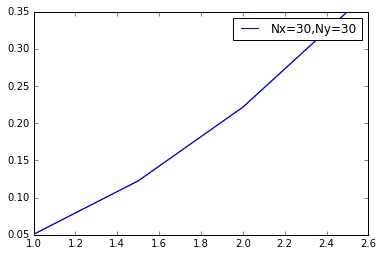

In [222]:
# Nx = 30, Ny = 30
n1 = [1.0,1.5,2.0,2.5]
Er1= [0.05062,0.12250,0.22151,0.3499]
convergence1 = [575,270,157,109]
plt.plot(n1,Er1)
plt.plot(n1, Er1, 'b', label='Nx=30,Ny=30')
plt.legend(loc='upper right')

In [223]:
# Nx = 50, Ny = 50
n2 = [1.0,1.5,2.0,2.5]
Er2= [0.03280,0.07415,0.13214,0.2072]
convergence2 = [1540,728,426,280]

In [224]:
# Nx = 80, Ny = 80
n3 = [1.0,1.5,2.0,2.5]
Er3= [0.02024,0.04616,0.08229,0.12876]
convergence3 = [3797,1802,1059,699]

## Grid Refinement:

(0, 1.0)

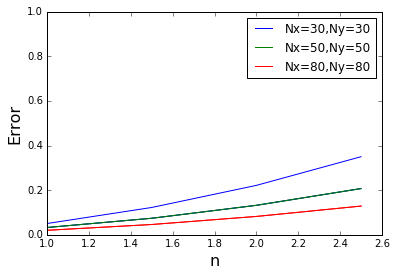

In [225]:
plt.xlabel('n', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.plot(n1,Er1,) 
plt.plot(n2,Er2,)
plt.plot(n3,Er3,)
plt.plot(n2, Er2, 'b', label='Nx=30,Ny=30')
plt.plot(n2, Er2, 'g', label='Nx=50,Ny=50')

plt.plot(n3, Er3, 'r', label='Nx=80,Ny=80')
plt.legend(loc='upper right')
plt.ylim(0, 1.0)


# SOR Method

In [226]:
counter = 0
n=1.0
u=np.zeros((Nx+2,Ny+2),dtype=float)


omega = 1.8
while (counter<5000):
    
    uold = u.copy()
    
    for i in range(1,Nx+1):
        for j in range (1,Ny+1):
            u[i,j]= ((8*(math.pi*math.pi)*(n**2)*(math.sin(2*math.pi*n*xc[i]))*(math.sin(2*math.pi*n*yc[j]))*(dy**2)*(dx**2)+uold[i+1,j]*(dy**2)
                    +u[i-1,j]*(dy**2)+uold[i,j+1]*(dx**2)+u[i,j-1]*(dx**2))/(2*(dx**2+dy**2)))*omega+(1-omega)*uold[i,j]
  
    for j in range(Ny+2):
         u[0,j]= 2*(math.sin(2*math.pi*n*x[1])*(math.sin(2*math.pi*n*yc[j])))-uold[1,j]
    
    for i in range(Nx+2):
        u[i,0]= 2*(math.sin(2*math.pi*n*xc[i])*(math.sin(2*math.pi*n*y[1])))-uold[i,1]

    for j in range(Ny+2):
        u[Nx+1,j]= 2*(math.sin(2*math.pi*n*x[Nx+1])*(math.sin(2*math.pi*n*yc[j])))-u[Nx,j]
    
    for i in range(Nx+2):
        u[i,Ny+1]= 2*(math.sin(2*math.pi*n*xc[i])*(math.sin(2*math.pi*n*y[Ny+1])))-u[i,Ny]
    
    if np.linalg.norm(uold-u)<10**-6:
        break
    
    counter = counter + 1
    
print (counter)

222


In [227]:
u_an=np.zeros((Nx+2,Ny+2),dtype=float)

for i in range(0,Nx+2):
    for j in range (0,Ny+2):
        u_an[i,j] = math.sin(2*math.pi*n*xc[i])*(math.sin(2*math.pi*n*yc[j]))
        


In [228]:
Er =  (np.linalg.norm(u-u_an))
print (Er)

0.0550315060901


In [229]:
# Nx = 30, Ny = 30
n1 = [1.0,1.5,2.0,2.5]
Er1= [0.0554,0.12246,0.22522,0.35052]
convergence1 = [519,210,249,133]

In [230]:
# Nx = 50, Ny = 50
n2 = [1.0,1.5,2.0,2.5]
Er2= [0.0329,0.07420,0.1321,0.20703]
convergence2 = [1125,476,379,285]

In [231]:
# Nx = 80, Ny = 80
n3 = [1.0,1.5,2.0,2.5]
Er3= [0.0205,0.04630,0.0823,0.12882]
convergence3 = [2185,1028,703,542]

# Grid Refinement

(0, 1.0)

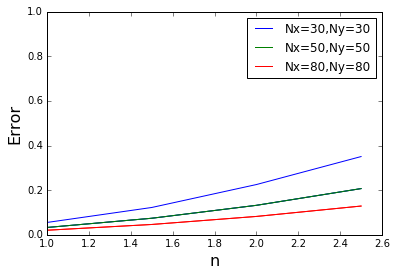

In [232]:
plt.xlabel('n', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.plot(n1,Er1,) 
plt.plot(n2,Er2,)
plt.plot(n3,Er3,)
plt.plot(n2, Er2, 'b', label='Nx=30,Ny=30')
plt.plot(n2, Er2, 'g', label='Nx=50,Ny=50')

plt.plot(n3, Er3, 'r', label='Nx=80,Ny=80')
plt.legend(loc='upper right')
plt.ylim(0, 1.0)


# Convergence

 when NX= 80, Ny = 80
 lett us take how does the convergence vary with the Jacobi method and SOR method

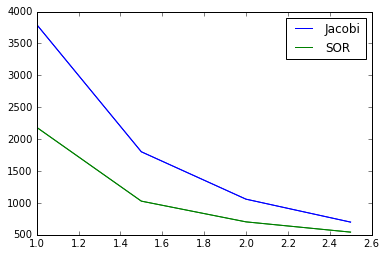

In [233]:
n = [1.0,1.5,2.0,2.5]
jc = [3797,1802,1059,699]
sc = [2185,1028,703,542]
plt.plot(n,jc,) 
plt.plot(n,sc)
plt.plot(n2, jc, 'b', label='Jacobi')
plt.plot(n2, sc, 'g', label='SOR')


plt.legend(loc='upper right')


# Convergence time with the grid size:

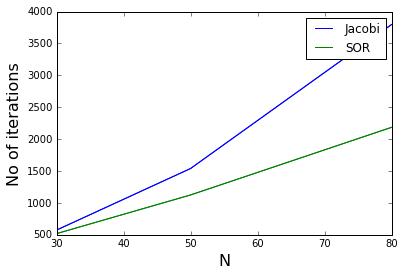

In [234]:
Nx = [30,50,80]
jc = [575,1540,3797]
sc = [519,1125,2185]
plt.plot(Nx,jc,) 
plt.plot(Nx,sc)
plt.plot(Nx, jc, 'b', label='Jacobi')
plt.plot(Nx, sc, 'g', label='SOR')

plt.xlabel('N', fontsize=16)
plt.ylabel('No of iterations', fontsize=16)
plt.legend(loc='upper right')


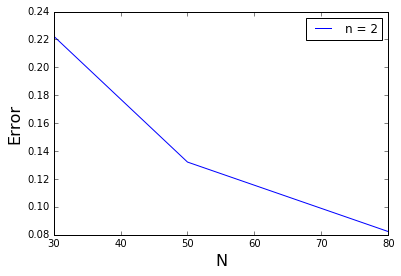

In [235]:
N = [30,50,80]
E = [0.2225,0.13214,0.08229]
plt.xlabel('N', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.plot(N,E, 'b', label='n = 2')
plt.legend(loc='upper right')

# Omega Vs Convergence

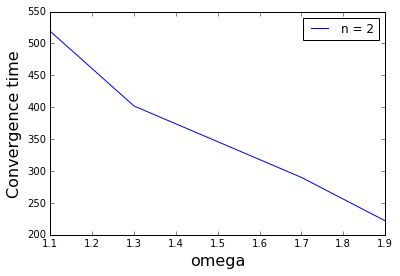

In [236]:
omega = [1.1,1.3,1.7,1.9]
convergence = [519,402,290,222]
plt.xlabel('omega', fontsize=16)
plt.ylabel('Convergence time', fontsize=16)
plt.plot(omega,convergence, 'b', label='n = 2')
plt.legend(loc='upper right')